### Community Structure and Network Analysis of Chat Data in Python
#### Authors : Harsh Shekhar, Aditya Gandhi



In [116]:
# Importing the required modules

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter

Total number of Edges= 91
Total number of Nodes= 130


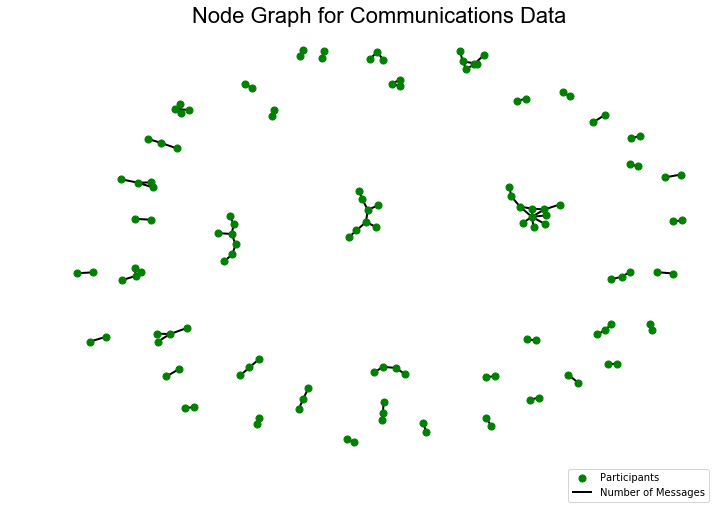

In [117]:
# Figure Dimensions
value_height=9
value_width=16
matplotlib.rcParams['figure.figsize']=[12, 8]

# Reading in the data for the Inviters and Invitees from the the Bloomberg Chat Data
df = pd.read_excel('dataset.xlsx')

# Creating a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, 'Inviter', 'Invitee', 'MsgCount')
for index, row in df.iterrows():
    G.add_edge(row['Inviter'], row['Invitee'])
    
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Participants')
nx.draw_networkx_edges(G, pos, with_labels=False, width=2.0,label='Number of Messages')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('base.png', dpi=400)

# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))

In [118]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{'P1': 0.05426356589147287,
 'P12': 0.023255813953488372,
 'P16': 0.023255813953488372,
 'P27': 0.023255813953488372,
 'P29': 0.023255813953488372,
 'P34': 0.023255813953488372,
 'P40': 0.023255813953488372,
 'P51': 0.023255813953488372,
 'P6': 0.023255813953488372,
 'P63': 0.031007751937984496}

In [119]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

{'P1': 0.05537098560354374,
 'P12': 0.04306632213608958,
 'P16': 0.04306632213608958,
 'P29': 0.03165374677002584,
 'P44': 0.03691399040236249,
 'P51': 0.03165374677002584,
 'P63': 0.04079967360261118,
 'P78': 0.033704078193461405,
 'P88': 0.033704078193461405,
 'P92': 0.033704078193461405}

In [120]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

{'P1': 0.588384145933081,
 'P12': 0.3260306212406697,
 'P129': 0.12567329761315732,
 'P16': 0.3983301149300385,
 'P36': 0.1067013276447334,
 'P44': 0.30111550820453614,
 'P63': 0.42147312122594704,
 'P78': 0.17544221059137885,
 'P88': 0.17544221059137885,
 'P92': 0.17544221059137885}

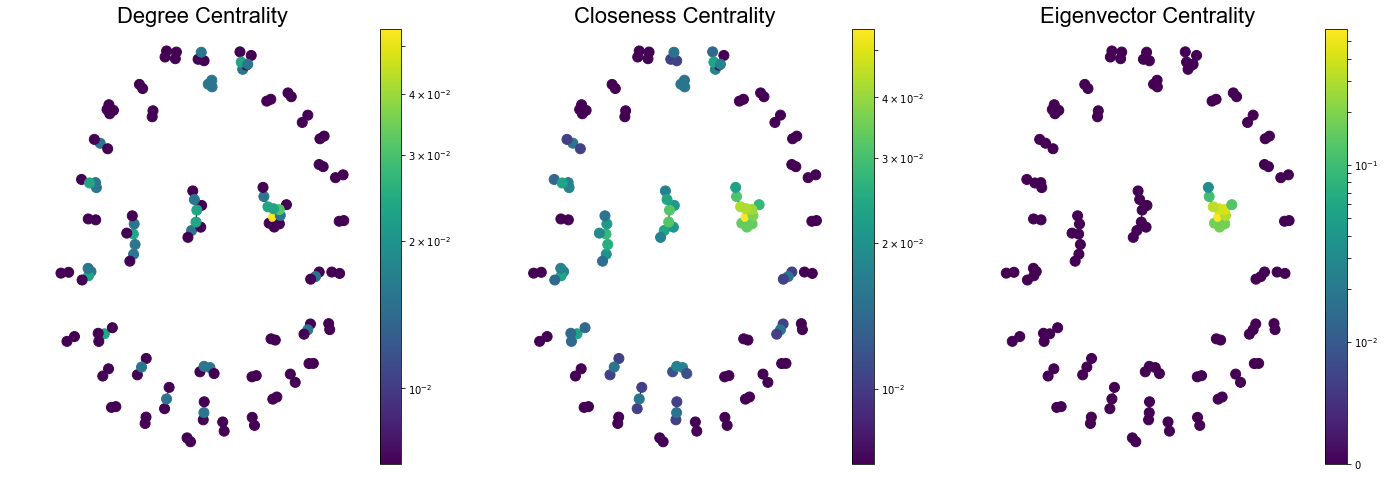

In [136]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)


#### Community Structure: Louvain Algorithm

In [122]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community.best_partition(G, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.9532665137060737
Total number of Communities= 46


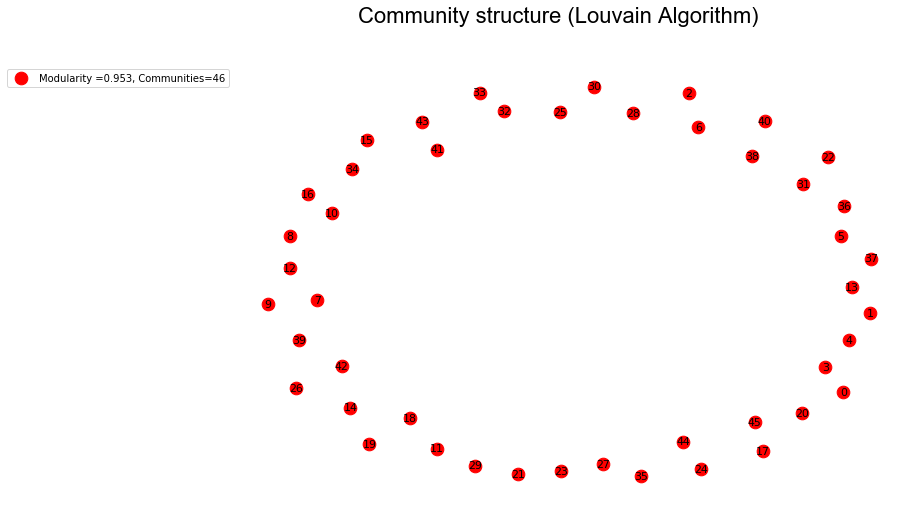

In [138]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [124]:
# Viewing the list of communities
community_df

,Members
Community_Num,
0,P94 | P51 | P30 | P95 | P61 | P126 | P29 | P119
1,P53 | P96 | P22 | P31
2,P92 | P88 | P44 | P16 | P103 | P12 | P1 | P63 ...
3,P77 | P17
4,P4 | P66 | P85
5,P82 | P21 | P60
6,P62 | P127
7,P69 | P8
8,P74 | P13


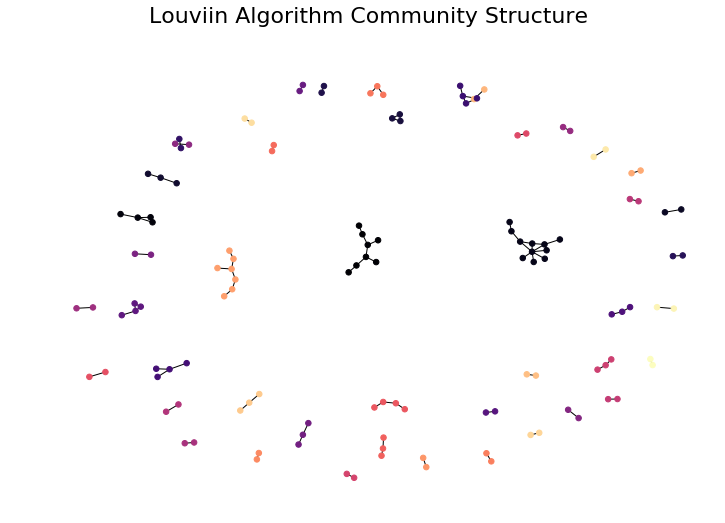

In [152]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()

##### Community Structure: Girvan-Newman Algorithm

In [126]:
# Using the Girvan-Newman algorithm to create a Communicty Structure
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G)

In [127]:
# Creating a dictionary for the community number assocaited with each node
com=0
thisdict={}

# Populating the items of the dictionary
for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in G.nodes()]
values_girvan

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 29,
 7,
 8,
 35,
 9,
 10,
 0,
 11,
 12,
 13,
 14,
 19,
 3,
 15,
 22,
 17,
 10,
 18,
 37,
 19,
 15,
 20,
 20,
 21,
 38,
 11,
 7,
 23,
 24,
 15,
 25,
 26,
 32,
 2,
 27,
 28,
 11,
 22,
 0,
 30,
 13,
 1,
 24,
 13,
 0,
 31,
 0,
 32,
 33,
 34,
 35,
 10,
 10,
 26,
 4,
 36,
 34,
 12,
 36,
 29,
 2,
 18,
 37,
 27,
 6,
 2,
 2,
 31,
 39,
 40,
 16,
 41,
 29,
 14,
 28,
 36,
 0,
 5,
 1,
 2,
 16,
 42,
 40,
 36,
 40,
 23,
 43,
 2,
 21,
 44,
 29,
 2,
 38,
 9,
 25,
 30,
 33,
 45,
 1,
 13,
 36,
 46,
 2,
 30,
 25,
 17,
 45,
 9,
 8,
 42,
 41,
 46,
 36,
 5,
 36,
 32,
 0,
 44,
 43,
 4,
 0,
 9,
 39]

Total number of Communities= 47
Modularity: 0.9464436662238856


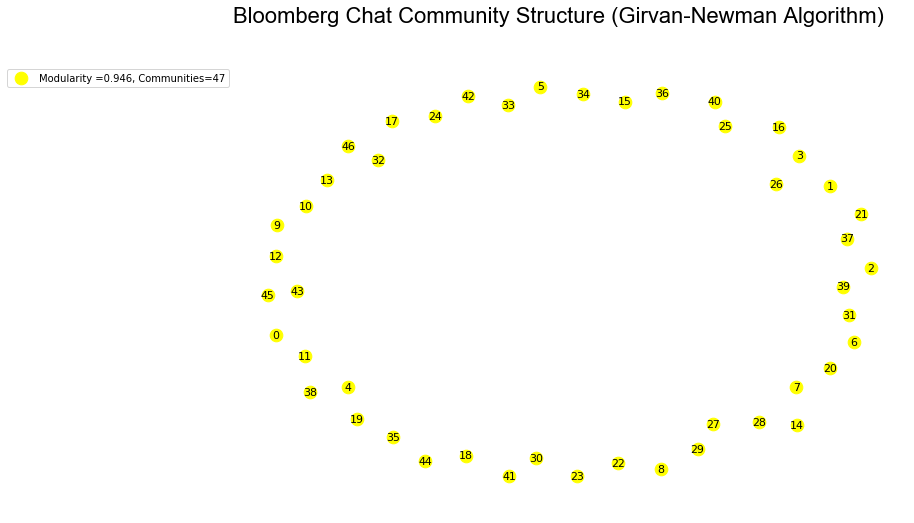

In [128]:
# Creating a dictionary like 'Community num':'List of participants'
dict_nodes_girvan={}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value=dict_nodes_girvan.get(community_num) + ' | ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
# Creating the output file
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Members'])
community_df_girvan.index.rename('Community Num', inplace=True)
community_df_girvan.to_csv('Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
mod_girv=community.modularity(thisdict,G)
print("Modularity:", mod_girv)

# Creation of the graph
pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('Bloomberg Chat Community Structure (Girvan-Newman Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Girvan-Newman.png', dpi=400, bbox_inches='tight')

In [129]:
# Viewing the list of communities
community_df_girvan

,Members
Community Num,
0,P94 | P126 | P29 | P95 | P61 | P119 | P51 | P30
1,P53 | P96 | P22 | P31
2,P92 | P44 | P63 | P16 | P12 | P129 | P1 | P88 ...
3,P77 | P17
4,P4 | P66 | P85
5,P82 | P60 | P21
6,P62 | P127
7,P69 | P8
8,P74 | P13


#### Community Structure: Finding Maximal Cliques

In [130]:
# Finding the Maximal Cliques associated with teh graph
a=nx.find_cliques(G)
i=0

# For each clique, print the members and also print the total number of communities
for clique in a:
    print (clique)
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

['P94', 'P29']
['P53', 'P31', 'P22']
['P4', 'P66']
['P4', 'P85']
['P82', 'P21', 'P60']
['P69', 'P8']
['P35', 'P6', 'P98']
['P123', 'P57']
['P67', 'P5']
['P68', 'P7']
['P43', 'P112']
['P10', 'P72']
['P51', 'P29']
['P51', 'P119']
['P51', 'P61']
['P115', 'P48']
['P80', 'P19']
['P124', 'P58']
['P70', 'P9']
['P15', 'P81']
['P15', 'P76']
['P38', 'P105']
['P83', 'P2']
['P26', 'P90']
['P96', 'P31']
['P121', 'P54']
['P6', 'P118']
['P104', 'P37']
['P95', 'P30']
['P109', 'P40']
['P106', 'P40']
['P114', 'P47']
['P61', 'P126']
['P23', 'P86']
['P41', 'P107']
['P65', 'P3']
['P103', 'P36']
['P3', 'P71']
['P1', 'P88']
['P1', 'P92']
['P1', 'P63', 'P44']
['P1', 'P63', 'P16']
['P1', 'P78']
['P1', 'P12', 'P16']
['P101', 'P27']
['P32', 'P97']
['P64', 'P2']
['P99', 'P33']
['P42', 'P111']
['P56', 'P122']
['P93', 'P28']
['P46', 'P40']
['P20', 'P27', 'P91']
['P87', 'P24']
['P75', 'P14']
['P89', 'P25']
['P50', 'P117']
['P116', 'P49']
['P62', 'P127']
['P74', 'P13']
['P77', 'P17']
['P29', 'P30']
['P108', 'P7']
['P

In [131]:
from math import *
import itertools as it

# Defining a circle that can be drawn around each community
def draw_circle_around_clique(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=next(colors)
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2
    cir=plt.Circle((center[0],center[1]),radius=rad*1.3,fill=False,color=color)
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    return color

# Setting a cycle of colors,
global colors, hatches
colors=it.cycle('b')


Clique to appear :  ['P94', 'P29']
Clique to appear :  ['P53', 'P31', 'P22']
Clique to appear :  ['P4', 'P66']
Clique to appear :  ['P4', 'P85']
Clique to appear :  ['P82', 'P21', 'P60']
Clique to appear :  ['P69', 'P8']
Clique to appear :  ['P35', 'P6', 'P98']
Clique to appear :  ['P123', 'P57']
Clique to appear :  ['P67', 'P5']
Clique to appear :  ['P68', 'P7']
Clique to appear :  ['P43', 'P112']
Clique to appear :  ['P10', 'P72']
Clique to appear :  ['P51', 'P29']
Clique to appear :  ['P51', 'P119']
Clique to appear :  ['P51', 'P61']
Clique to appear :  ['P115', 'P48']
Clique to appear :  ['P80', 'P19']
Clique to appear :  ['P124', 'P58']
Clique to appear :  ['P70', 'P9']
Clique to appear :  ['P15', 'P81']
Clique to appear :  ['P15', 'P76']
Clique to appear :  ['P38', 'P105']
Clique to appear :  ['P83', 'P2']
Clique to appear :  ['P26', 'P90']
Clique to appear :  ['P96', 'P31']
Clique to appear :  ['P121', 'P54']
Clique to appear :  ['P6', 'P118']
Clique to appear :  ['P104', 'P37']

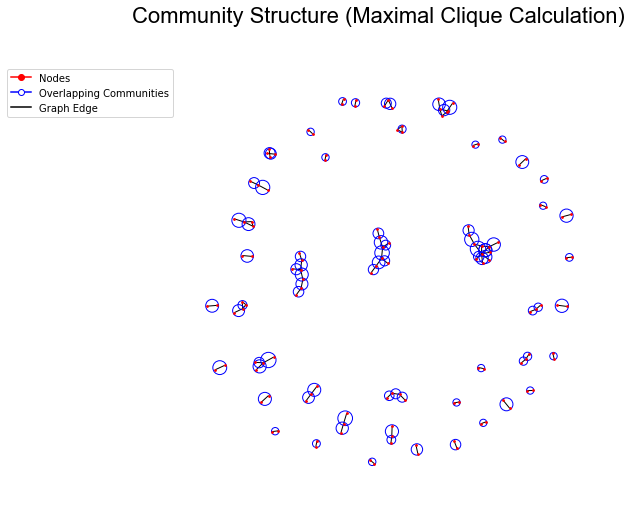

In [132]:
# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>1]

# Draw the graph
nx.draw_networkx(G,pos, node_size=3, with_labels=False)
for clique in cliques:
    print("Clique to appear : ",clique)
    nx.draw_networkx_nodes(G,pos,nodelist=clique,node_color=draw_circle_around_clique(clique,pos),node_size=1000, alpha=0)
plt.suptitle('Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [141]:
print(len(cliques))

79


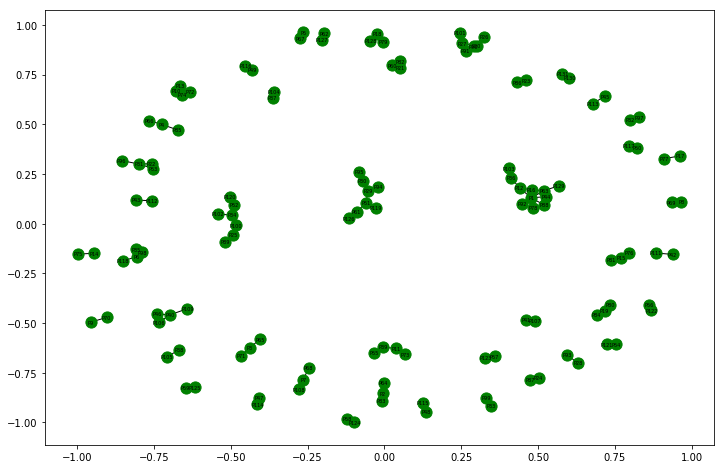

In [153]:
nx.draw_networkx(G, pos,node_color='green', node_size=125, label='Participants', font_size=5)
plt.savefig('nodes.png',dpi=400)